<a href="https://colab.research.google.com/github/RubenCarty/Master-Artificial-Intelligence-UNIR/blob/main/Sol_Act_3_Deteccio%CC%81n_Anomalias_ML_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

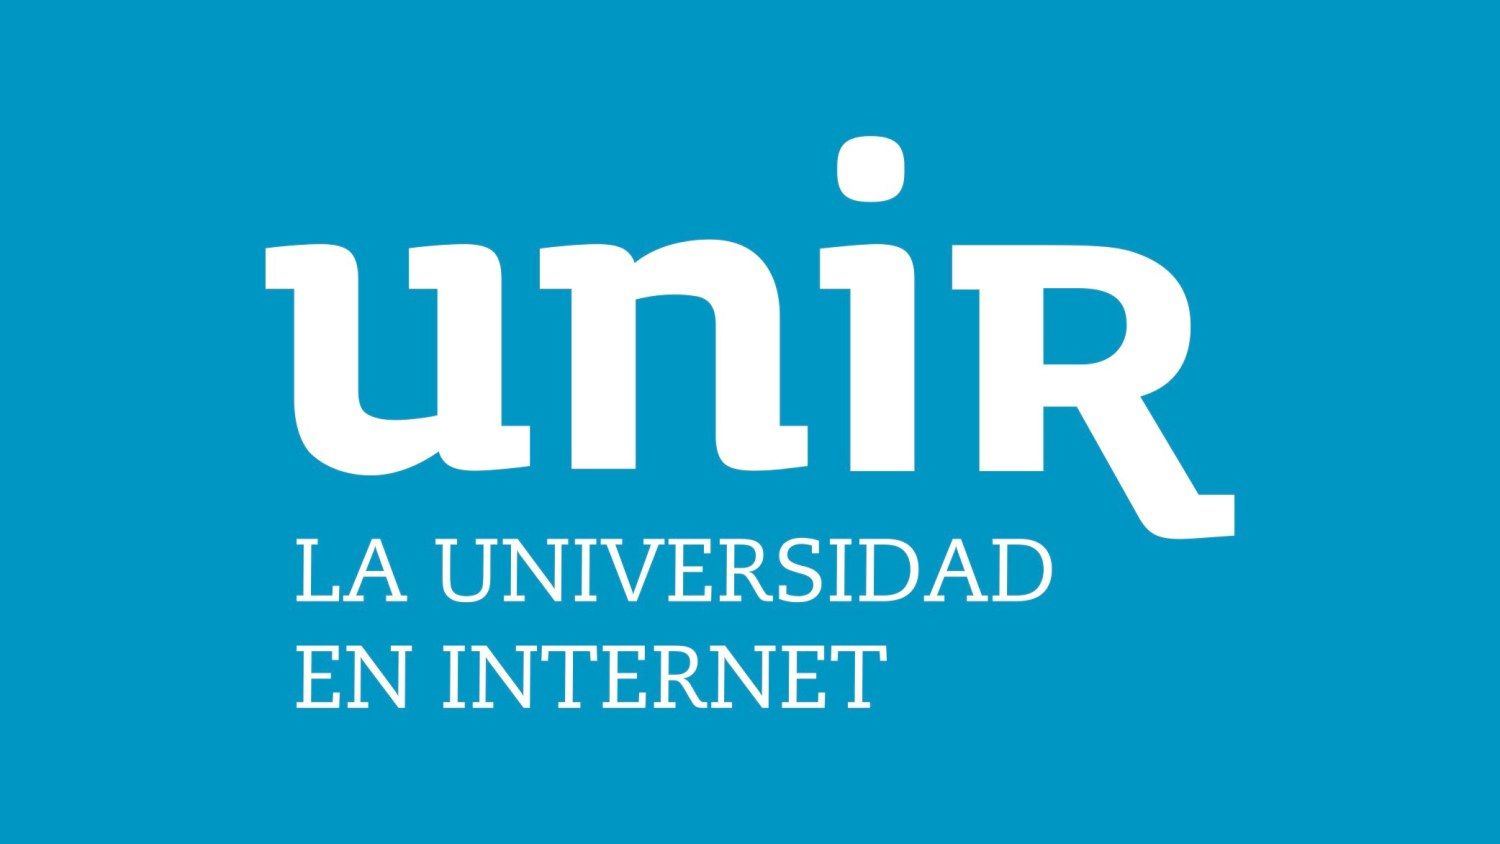

<center>

# **Actividad 3: Explorando patrones ocultos: Detección de Anomalías en datos**

   # **Curso: Aprendizaje Automatico no Supervisado**

# **Máster Universitario en Inteligencia Artificial**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>


_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad grupal: Explorando patrones ocultos: Detección de Anomalías en datos
## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de las técnicas de detección de anomalías. El objetivo es analizar si existen anomalías en el conjunto de datos aplicando técnicas univariantes y multivariantes. Debe detallar los pasos que hay que realizar para detección de valores inusuales.

- 	Entender los métodos media móvil, z-score, Isolation Forest y Local Outlier Factor
- 	Implementar el código para cada una de estas técnicas y analizar si existen o no anomalía
-
	Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.

Descripción de la actividad

Debes realizar la actividad en el Notebook adjunto. Debes ir completando el código solicitado, así como responder a las preguntas que se van realizando.

Tareas que
- alizar
	Detección de
- malías.
	Debes completar el código pedido en este notebook y contestar las pregunt
- finales.
	Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de De
- Learning.
	Para cada artí
- O indicar:
o	Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección
-  anomalías.
o	Técnicas de detección de anoma
- s empleadas.
o	Principales resultados de la aplicación y de la investigación.


#### Integrantes del grupo

In [ ]:
# Coloca en este espacio el nombre de los integrantes del grupo
# Jorge Luis Chicoma Gamarra
# Ruben Quispe Llacctarimay
# Yeins Yefferson Aristizabal López
# Renzo Vicente Castro
# Jaime Torres Rodríguez

## Detección de anomalías

Los transformadores juegan un papel muy importante en el sistema eléctrico. Aunque son algunos de los componentes más confiables de la red eléctrica, también son propensos a fallar debido a muchos factores, tanto internos como externos. Podría haber muchos iniciadores que causen una falla en el transformador, pero los que potencialmente pueden conducir a una falla catastrófica son los siguientes:
Falla mecánica
Falla dieléctrica

Contenido
Estos datos se recopilaron a través de dispositivos IoT desde el 25 de junio de 2019 hasta el 14 de abril de 2020 y se actualizaron cada 15 minutos.
El dataset contiene 19352 registros.
Descripción de los parámetros:
Voltaje de corriente:
1. VL1- Fase Línea 1
2. VL2- Fase Línea 2
3. VL3- Fase Línea 3
4. IL1- Línea actual 1
5. IL2- Línea actual 2
6. IL3- Línea actual 3
7. VL12- Línea de tensión 1 2
8. VL23- Línea de tensión 2 3
9. VL31- Línea de tensión 3 1
10. INUT-Corriente neutra

# Introducción

La detección de anomalías en conjuntos de datos constituye un reto fundamental en diversas áreas, incluyendo la ingeniería y la ciencia de datos. Este análisis es crucial para identificar patrones atípicos que puedan representar errores, eventos inesperados o problemas potenciales. En esta actividad grupal, se exploraron distintas técnicas para la detección de anomalías, empleando métodos tanto univariados como multivariados. Los métodos utilizados incluyeron Media Móvil, Z-Score, Isolation Forest y Local Outlier Factor (LOF), cada uno de ellos seleccionado por su capacidad para abordar diferentes escenarios de detección.

El objetivo principal fue aplicar estas técnicas para analizar un conjunto de datos e identificar valores atípicos que podrían ser indicadores de irregularidades o eventos críticos. Además, se reflexionó sobre los resultados obtenidos y se propusieron mejoras para optimizar el desempeño de estas metodologías.

# Descripción de las actividades realizadas

1. Preprocesamiento de Datos:

- Se cargó un conjunto de datos de mediciones eléctricas con múltiples variables como voltajes y corrientes. Se verificó la integridad del conjunto de datos, confirmando la ausencia de valores nulos o datos incorrectos.

- Se escaló el conjunto de datos para garantizar la uniformidad en las unidades de medida, utilizando la normalización con StandardScaler.

2. Aplicación de las Técnicas de Detección de Anomalías:

- Media Móvil:
Se aplicó un enfoque basado en la media móvil para identificar valores que se desviaban significativamente de un rango de confianza determinado por el umbral configurado. Los valores atípicos se visualizaron en un gráfico para observar su distribución temporal.

- Z-Score:
Se calculó el puntaje Z de cada observación en el conjunto de datos, permitiendo identificar anomalías basadas en su distancia de la media en términos de desviaciones estándar.

- Isolation Forest:
Se utilizó este algoritmo basado en árboles para identificar puntos que se encontraban aislados del resto de las observaciones. Este método es eficiente para conjuntos de datos grandes y multidimensionales.

- Local Outlier Factor (LOF):
Este enfoque detectó anomalías basándose en la densidad local de las observaciones, identificando puntos que tenían una densidad significativamente menor en comparación con sus vecinos inmediatos.

3. Análisis Comparativo:

Se construyó un cuadro comparativo que resumía las anomalías detectadas por cada método, destacando fortalezas y limitaciones de cada uno. Además, se proporcionaron reflexiones sobre cómo mejorar la eficacia de cada técnica.

4. Visualización de Resultados:

Los resultados de cada método se representaron gráficamente para una mejor interpretación, permitiendo identificar patrones y tendencias en las anomalías detectadas.

# Fase 1: Carga y Preprocesamiento de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?

df = pd.read_csv('/content/drive/MyDrive/UNIR/ML_US/muinar07_act3_CurrentVoltage.csv', sep=',', na_values=['?'])

#df = pd.read_csv('muinar07_act3_CurrentVoltage.csv', sep=',', na_values=['?'])
df['DeviceTimeStamp'] = pd.to_datetime(df['DeviceTimeStamp'])


In [ ]:
print(df.head())


      DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0 2019-06-25 13:06:00    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1 2019-06-27 10:49:00  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2 2019-06-27 10:51:00  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DeviceTimeStamp  19352 non-null  datetime64[ns]
 1   VL1              19352 non-null  float64       
 2   VL2              19352 non-null  float64       
 3   VL3              19352 non-null  float64       
 4   IL1              19352 non-null  float64       
 5   IL2              19352 non-null  float64       
 6   IL3              19352 non-null  float64       
 7   VL12             19352 non-null  float64       
 8   VL23             19352 non-null  float64       
 9   VL31             19352 non-null  float64       
 10  INUT             19352 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.6 MB
None


In [ ]:
print(df.describe())

                     DeviceTimeStamp           VL1           VL2  \
count                          19352  19352.000000  19352.000000   
mean   2019-11-06 10:30:04.545266944    241.068019    240.515456   
min              2019-06-25 13:06:00      0.000000      0.000000   
25%              2019-08-22 00:56:15    235.400000    235.100000   
50%              2019-10-27 13:52:30    242.700000    242.100000   
75%              2020-01-29 16:18:45    247.500000    246.700000   
max              2020-04-14 00:30:00    261.200000    261.300000   
std                              NaN      9.536380      9.801129   

                VL3           IL1           IL2           IL3         VL12  \
count  19352.000000  19352.000000  19352.000000  19352.000000  19352.00000   
mean     239.912293     73.710857     58.970592     83.226555    379.47530   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%      235.100000     46.775000     31.500000     56.300000    400.70000 

#### ¿Cuántas instancias tiene el dataset?

In [ ]:
# Pon aquí tu código
print("Número de instancias: ",len(df))

Número de instancias:  19352


Los datos contienen 19,352 instancias, y el tipo de dato predominante es float64.

#### ¿Cuál es el tipo de datos predominante en las variables?
**Respuesta: el tipo de dato predominante es float64**

In [ ]:
#Inserta acá el código
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DeviceTimeStamp  19352 non-null  datetime64[ns]
 1   VL1              19352 non-null  float64       
 2   VL2              19352 non-null  float64       
 3   VL3              19352 non-null  float64       
 4   IL1              19352 non-null  float64       
 5   IL2              19352 non-null  float64       
 6   IL3              19352 non-null  float64       
 7   VL12             19352 non-null  float64       
 8   VL23             19352 non-null  float64       
 9   VL31             19352 non-null  float64       
 10  INUT             19352 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.6 MB
None


## Variables nulas

#### ¿Tiene este dataset datos faltantes?

¿Tiene este dataset datos faltantes?

**Respuesta: no tiene valores faltantes**

In [ ]:
print(df.isnull().sum())

DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


In [ ]:
print((df == '?').sum())

DeviceTimeStamp    0
VL1                0
VL2                0
VL3                0
IL1                0
IL2                0
IL3                0
VL12               0
VL23               0
VL31               0
INUT               0
dtype: int64


No hay valores faltantes (NaN) ni valores marcados como ?.

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

In [ ]:
### PON AQUÍ TU CÓDIGO EN CASO DE QUE SEA NECESARIO HACER ALGÚN TRATAMIENTO ADICIONAL
print(df.describe())

                     DeviceTimeStamp           VL1           VL2  \
count                          19352  19352.000000  19352.000000   
mean   2019-11-06 10:30:04.545266944    241.068019    240.515456   
min              2019-06-25 13:06:00      0.000000      0.000000   
25%              2019-08-22 00:56:15    235.400000    235.100000   
50%              2019-10-27 13:52:30    242.700000    242.100000   
75%              2020-01-29 16:18:45    247.500000    246.700000   
max              2020-04-14 00:30:00    261.200000    261.300000   
std                              NaN      9.536380      9.801129   

                VL3           IL1           IL2           IL3         VL12  \
count  19352.000000  19352.000000  19352.000000  19352.000000  19352.00000   
mean     239.912293     73.710857     58.970592     83.226555    379.47530   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%      235.100000     46.775000     31.500000     56.300000    400.70000 

In [ ]:
zero_values = df[(df.iloc[:, 1:] == 0).any(axis=1)]
print("Cantidad de filas con al menos un valor 0: ", len(zero_values))

Cantidad de filas con al menos un valor 0:  1749


El dataset está limpio y listo para análisis.
- Sin embargo, 1,749 filas contienen al menos un valor de cero, lo que podría representar fallos en la captura de datos o condiciones anormales.

# Fase 2: Exploración de Distribuciones

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

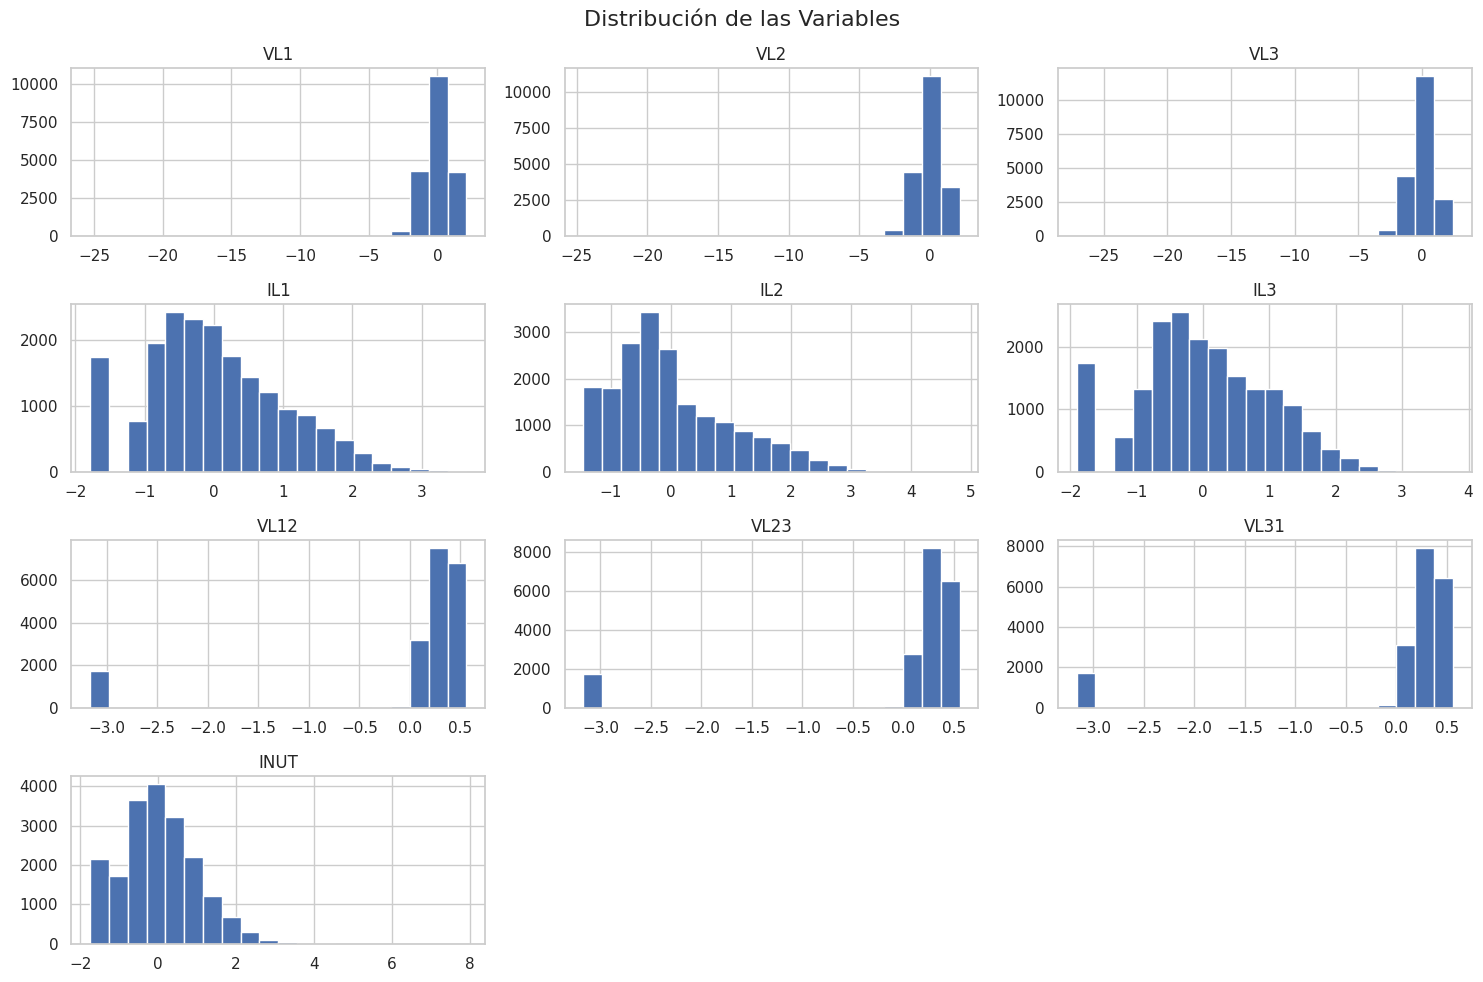

In [ ]:
# Análisis estadístico básico
# Visualización de la distribución de cada variable
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la estética de los gráficos
sns.set(style="whitegrid")

# Visualizar la distribución de cada variable
df_scaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de las Variables', fontsize=16)
plt.tight_layout()
plt.show()

## Distribución de las Variables
1. Descripción:

- Este gráfico muestra histogramas para cada una de las variables en el dataset, destacando sus distribuciones.
- Las variables VL1, VL2, VL3, VL12, VL23 y VL31 presentan valores altamente concentrados hacia un extremo, lo que sugiere una distribución sesgada.
- Las variables IL1, IL2, IL3 y INUT muestran distribuciones más equilibradas, pero con colas largas, lo que podría indicar la presencia de valores atípicos.


La presencia de sesgos en varias variables sugiere que estas distribuciones podrían ser afectadas por anomalías o por valores extremos.
Las colas largas de algunas variables podrían ser indicativas de datos raros o extremos.



Fase 3: Detección de Anomalías con Media Móvil

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Media Móvil sobre la variable INUT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
max(df['INUT'])

145.8

In [ ]:
min(df['INUT'])

0.0

Al revisar las estadísticas básicas, se identificaron valores extremos en las variables, como valores de INUT entre 0 y 145.8.

In [ ]:
# Calcula la media y desviación estándar móvil
window_size = 50
df['INUT_Moving_Avg'] = df['INUT'].rolling(window=window_size).mean()
df['INUT_Moving_Std'] = df['INUT'].rolling(window=window_size).std()

In [ ]:
# Define un umbral para detectar anomalías
threshold = 3
df['Umbral_superior'] = df['INUT_Moving_Avg'] + (threshold * df['INUT_Moving_Std'])
df['Umbral_inferior'] = np.maximum(df['INUT_Moving_Avg'] - (threshold * df['INUT_Moving_Std']), 0)

In [ ]:
# Detección de anomalías
df['Anomalias'] = (df['INUT'] > df['Umbral_superior']) | (df['INUT'] < df['Umbral_inferior'])


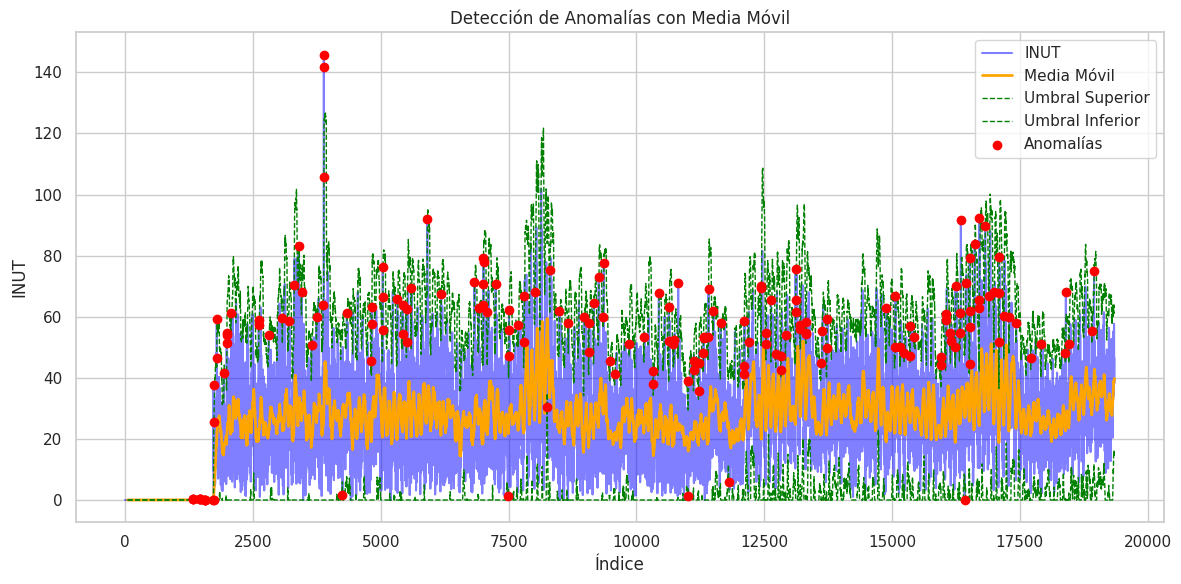

In [ ]:
# Visualiza los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['INUT'], label='INUT', color='blue', alpha=0.5)
plt.plot(df.index, df['INUT_Moving_Avg'], label='Media Móvil', color='orange', linewidth=2)
plt.plot(df.index, df['Umbral_superior'], label='Umbral Superior', color='green', linestyle='--', linewidth=1)
plt.plot(df.index, df['Umbral_inferior'], label='Umbral Inferior', color='green', linestyle='--', linewidth=1)
anomalies = df[df['Anomalias']]
plt.scatter(anomalies.index, anomalies['INUT'], label='Anomalías', color='red', zorder=5)
plt.title('Detección de Anomalías con Media Móvil')
plt.xlabel('Índice')
plt.ylabel('INUT')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Detección de Anomalías con Media Móvil
1. Descripción:

- Este gráfico utiliza el método de media móvil para la detección de anomalías en la variable INUT.
- Las líneas verdes punteadas representan los umbrales superior e inferior, calculados a partir de la media móvil y la desviación estándar.
- Los puntos rojos indican las anomalías detectadas, es decir, valores que exceden los umbrales.


Se observan numerosas anomalías distribuidas a lo largo del tiempo, lo que podría indicar picos en la corriente neutra (INUT) durante ciertos períodos.
Este método es útil para detectar cambios abruptos, pero puede ser sensible a la configuración del tamaño de la ventana.

# Fase 4: Detección con Z-Score

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías Z-Score
# Pon aquí tu código
def calculate_z_score(data):
  media = np.mean(data)
  desviacion_std = np.std(data)
  return (data - media) / desviacion_std

columns = ['VL1','VL2','VL3','IL1','IL2','IL3','VL12','VL23','VL31','INUT']
z_scores = df[columns].apply(calculate_z_score, axis=0)

In [ ]:
z_scores

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,-25.279431,-24.540200,-27.121040,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
1,-0.248321,-0.185234,-0.125740,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
2,-0.279780,-0.205640,-0.159654,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
3,-0.122483,-0.052593,0.009915,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
4,-0.122483,-0.052593,0.009915,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
...,...,...,...,...,...,...,...,...,...,...
19347,0.559135,0.426956,0.496011,0.128204,-0.335384,0.077358,0.387835,0.366571,0.384193,0.773681
19348,0.601080,0.467769,0.552534,0.079726,-0.419412,0.022322,0.394504,0.373271,0.392521,0.846515
19349,0.705945,0.559597,0.688189,0.089421,-0.540511,-0.179474,0.408675,0.389182,0.405847,0.826651
19350,0.695458,0.549394,0.631666,-0.087524,-0.550396,0.111755,0.406175,0.383320,0.403348,1.250412


In [ ]:
# Define un umbral para detectar anomalías (por ejemplo, 3 desviaciones estándar)
threshold = 2
anomalies = (z_scores.abs() > threshold)

In [ ]:
resume = anomalies.sum().reset_index()
resume.columns = ['Variable', 'Anomalías detectadas']
resume

,Variable,Anomalías detectadas
0,VL1,366
1,VL2,283
2,VL3,493
3,IL1,584
4,IL2,936
5,IL3,436
6,VL12,1734
7,VL23,1729
8,VL31,1734
9,INUT,584


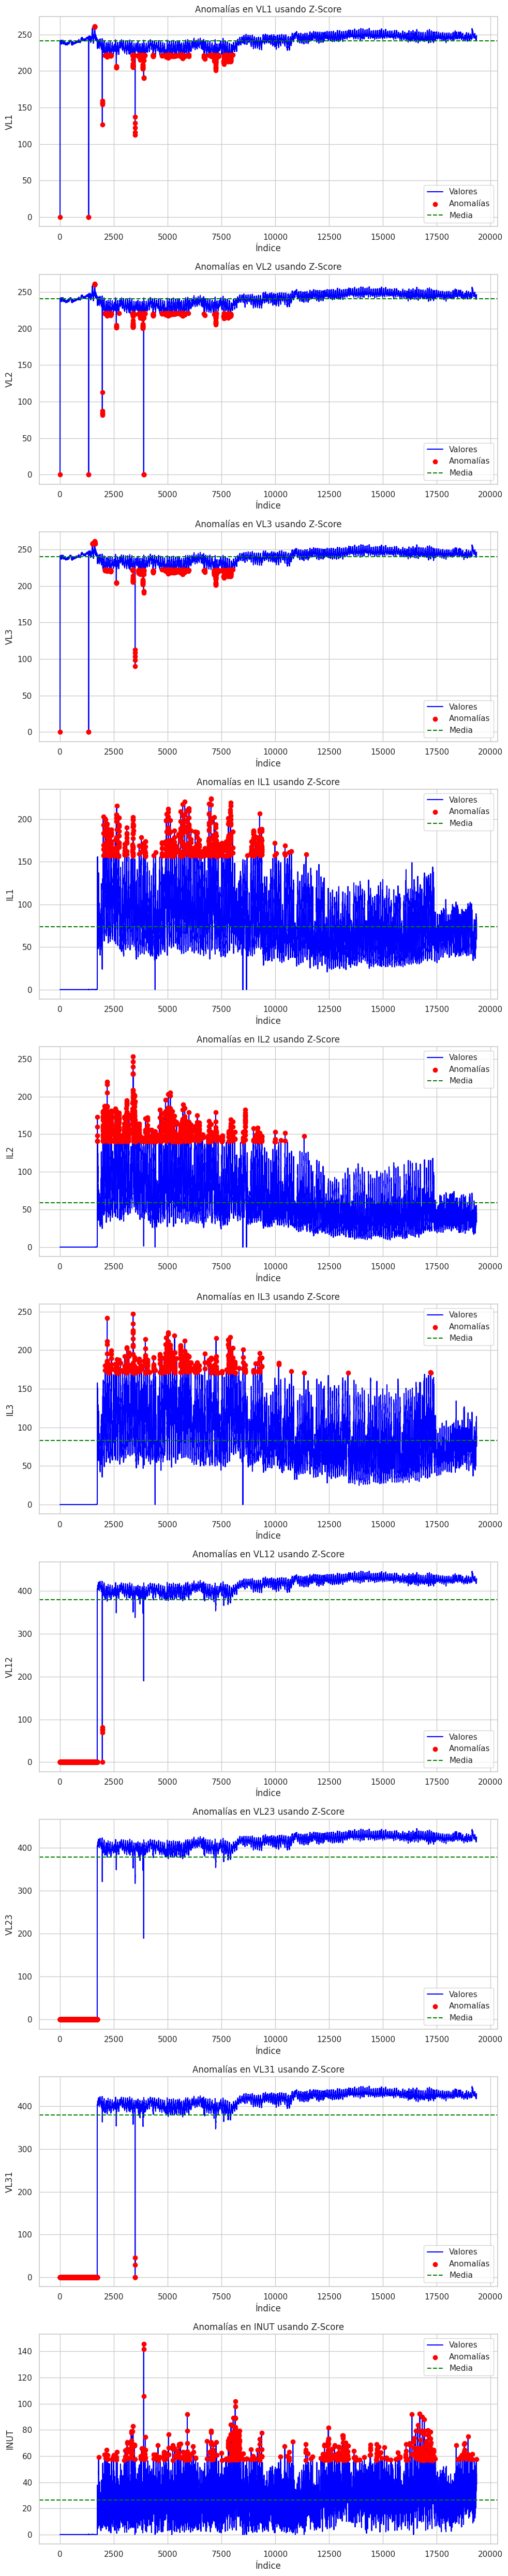

In [ ]:
num_columnas = len(columns)
fig, axes = plt.subplots(nrows=num_columnas, ncols=1, figsize=(10, 5 * num_columnas))

for i, columna in enumerate(columns):
    ax = axes[i] if num_columnas > 1 else axes
    ax.plot(df[columns].index, df[columns][columna], label='Valores', color='blue')
    ax.scatter(df[columns].index[anomalies[columna]],
               df[columns][columna][anomalies[columna]],
               color='red', label='Anomalías', zorder=5)
    ax.axhline(np.mean(df[columns][columna]), color='green', linestyle='--', label='Media')
    ax.set_title(f'Anomalías en {columna} usando Z-Score')
    ax.set_xlabel('Índice')
    ax.set_ylabel(columna)
    ax.legend()

plt.tight_layout()
plt.show()

1. **VL1 (Fase Línea 1)**
La tensión en la Fase Línea 1 es generalmente estable alrededor de un valor promedio (~250 unidades), pero presenta algunas caídas abruptas detectadas como anomalías, especialmente al inicio. Estas pueden deberse a interrupciones momentáneas en el suministro o fallas en la línea.
2. **VL2 (Fase Línea 2)**
Presenta un comportamiento similar a VL1, esta variable también muestra estabilidad en torno a 250 unidades con caídas abruptas identificadas como anomalías al inicio del índice. Las anomalías posiblemente sean por problemas comunes en la alimentación eléctrica de esta fase.
3. **VL3 (Fase Línea 3)**
La Fase Línea 3 presenta menos fluctuaciones significativas en comparación con VL1 y VL2, pero las anomalías iniciales destacan por ser caídas abruptas de tensión, podrían deberse a un evento transitorio o una falla momentánea en el sistema.
4. **IL1 (Línea Actual 1)**
La corriente en la Línea 1 oscila alrededor de valores estables, pero hay picos significativos de hasta 250 unidades que son clasificados como anomalías. Estos podrían estar relacionados con sobrecargas o fluctuaciones inesperadas en el consumo.
5. **IL2 (Línea Actual 2)**
Similar a IL1, presenta estabilidad con picos de corriente en ciertas regiones (por ejemplo, índices 2500-7500) que se clasifican como anomalías. Las fluctuaciones podrían ser causadas por cambios bruscos en la carga o perturbaciones en el sistema.
6. **IL3 (Línea Actual 3)**
Presenta un comportamiento casi idéntico al de IL1 e IL2, con picos significativos en intervalos similares. Las anomalías pueden deberse a eventos específicos que afectan de manera similar a las tres líneas.
7. **VL12 (Línea de Tensión 1-2)**
Muestra valores consistentemente altos (~400 unidades), pero con caídas significativas al inicio, identificadas como anomalías. Estas caídas podrían indicar eventos transitorios que afectaron la tensión entre estas dos fases.
8. **VL23 (Línea de Tensión 2-3)**
Similar a VL12, con valores altos promedio (~400 unidades) y algunas caídas iniciales que destacan como anomalías. Las caídas podrían ser causadas por problemas en el suministro o el sistema de medición.
9. **VL31 (Línea de Tensión 3-1)**
Muestra estabilidad similar a VL12 y VL23, pero con caídas abruptas detectadas como anomalías. Estas caídas podrían estar relacionadas con problemas en la conexión entre estas fases.
10. **INUT (Corriente Neutra)**
La corriente neutra presenta un nivel base más bajo (~20 unidades), pero con picos significativos que llegan hasta 140 unidades.Estos picos podrían deberse a desequilibrios en el sistema, corrientes de fuga, o perturbaciones específicas.

**Conclusion:**
- Las caídas en las tensiones (VL1, VL2, VL3, VL12, VL23, VL31) al inicio sugieren posibles eventos transitorios o fallas en el suministro eléctrico.
- Los picos en las corrientes (IL1, IL2, IL3, INUT) apuntan a sobrecargas o perturbaciones.

El método identificó anomalías en cada columna utilizando un umbral de 2 desviaciones estándar.
- La variable VL12 tiene la mayor cantidad de anomalías (1,734).


- Este método asume normalidad en los datos, por lo que puede no ser ideal para variables sesgadas.

# Fase 5: Detección con Isolation Forest

In [ ]:
df_scaled.head()

,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,-25.279431,-24.540200,-27.121040,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
1,-0.248321,-0.185234,-0.125740,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
2,-0.279780,-0.205640,-0.159654,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
3,-0.122483,-0.052593,0.009915,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396
4,-0.122483,-0.052593,0.009915,-1.786681,-1.457402,-1.908506,-3.163349,-3.169864,-3.164521,-1.742396


In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Isolation Forest, configura el parámetro contamination en 5%
# Pon aquí tu código
from sklearn.ensemble import IsolationForest

columns = ['VL1','VL2','VL3','IL1','IL2','IL3','VL12','VL23','VL31','INUT']

# Configuramos Isolation Forest con un 5% de contaminación
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_scaled['anomaly_score_isolation_1'] = iso_forest.fit_predict(df_scaled[columns])  # Predicción (-1 = anomalía, 1 = normal)
df_scaled['score_isolation_1'] = iso_forest.decision_function(df_scaled[columns])   # Puntaje de cada dato

# Mostrar la distribución de los resultados
print("Distribución de predicciones (-1 = anomalía, 1 = normal):")
print(df_scaled['anomaly_score_isolation_1'].value_counts())

Distribución de predicciones (-1 = anomalía, 1 = normal):
anomaly_score_isolation_1
 1    18388
-1      964
Name: count, dtype: int64


In [ ]:
# Agrega las columnas de puntaje y si es dato anómalo o no en el dataframe
# Crear una columna interpretando el puntaje de predicción
df_scaled['is_anomaly_isolation_1'] = df_scaled['anomaly_score_isolation_1'].apply(lambda x: 'Anomalía' if x == -1 else 'Normal')

# Verificar las nuevas columnas en el dataframe
print(df_scaled[['score_isolation_1', 'anomaly_score_isolation_1', 'is_anomaly_isolation_1']].head())

   score_isolation_1  anomaly_score_isolation_1 is_anomaly_isolation_1
0          -0.149753                         -1               Anomalía
1           0.025791                          1                 Normal
2           0.025235                          1                 Normal
3           0.034232                          1                 Normal
4           0.034232                          1                 Normal


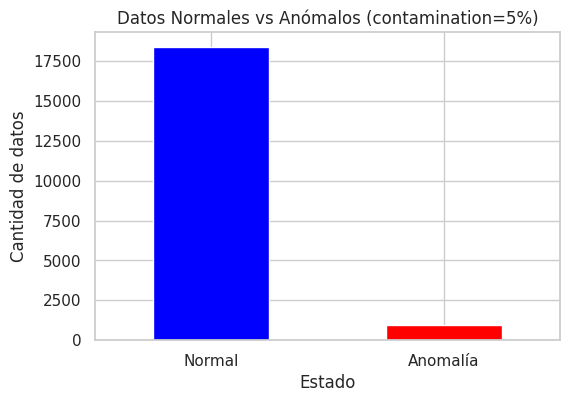

In [ ]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
import matplotlib.pyplot as plt

# Contar los datos normales y anómalos
counts = df_scaled['is_anomaly_isolation_1'].value_counts()

# Crear el gráfico
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Datos Normales vs Anómalos (contamination=5%)")
plt.ylabel("Cantidad de datos")
plt.xlabel("Estado")
plt.xticks(rotation=0)
plt.show()

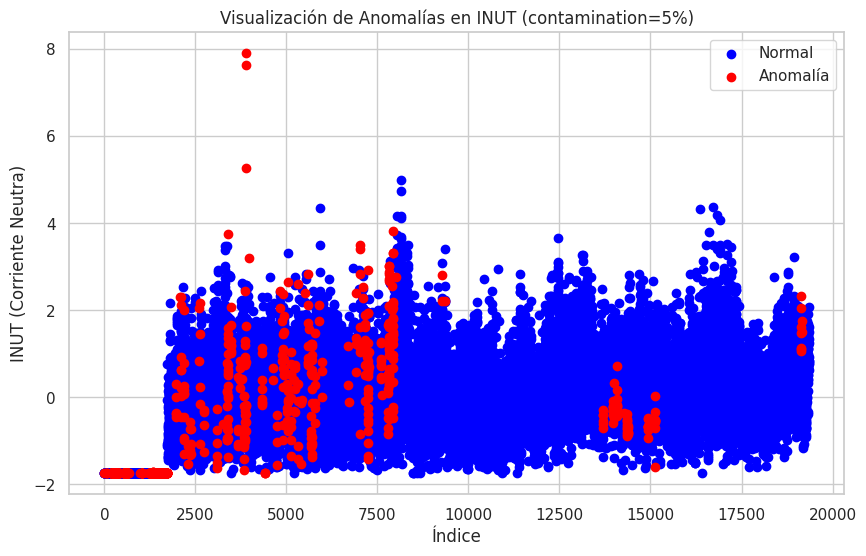

In [ ]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.figure(figsize=(10, 6))

# Crear un scatter plot diferenciando anomalías y normales
plt.scatter(
    df_scaled[df_scaled['is_anomaly_isolation_1'] == 'Normal'].index,
    df_scaled[df_scaled['is_anomaly_isolation_1'] == 'Normal']['INUT'],
    color='blue',
    label='Normal'
)
plt.scatter(
    df_scaled[df_scaled['is_anomaly_isolation_1'] == 'Anomalía'].index,
    df_scaled[df_scaled['is_anomaly_isolation_1'] == 'Anomalía']['INUT'],
    color='red',
    label='Anomalía'
)

# Configurar título, etiquetas y leyenda
plt.title("Visualización de Anomalías en INUT (contamination=5%)")
plt.xlabel("Índice")
plt.ylabel("INUT (Corriente Neutra)")
plt.legend(loc='upper right')  # Leyenda configurada correctamente
plt.show()

1. Análisis de la distribución de anomalías:
Distribución de los datos normales (azules):

* Los datos normales estan distribuidos de manera más densa en un rango específico de valores de INUT, que probablemente corresponden al funcionamiento estándar del transformador.

2. Distribución de las anomalías (rojas):

* Las anomalías están dispersas a lo largo del eje del tiempo/índice.
Aparecen tanto en valores muy bajos como en valores más altos de INUT, indicando que el modelo identifica como anómalos los valores fuera de ciertos rangos estándar.

3. Patrones en los datos:

* Algunas anomalías se agrupan en regiones específicas, lo que podría verse como eventos inusuales durante esos períodos de tiempo, como cambios repentinos en el comportamiento de la corriente neutra (INUT).
La presencia de puntos rojos en la parte inferior podría corresponder a valores atipicos bajos, mientras que los puntos en la parte superior representan valores atipicos altos.

In [ ]:
# Repite los pasos anteriores con el parámetro de contamination en 1%
iso_forest_1 = IsolationForest(contamination=0.01, random_state=42)
df_scaled['anomaly_score_isolation_2'] = iso_forest_1.fit_predict(df_scaled[columns])
df_scaled['score_isolation_2'] = iso_forest_1.decision_function(df_scaled[columns])
df_scaled['is_anomaly_2'] = df_scaled['anomaly_score_isolation_2'].apply(lambda x: 'Anomalía' if x == -1 else 'Normal')
print(df_scaled['anomaly_score_isolation_2'].value_counts())

anomaly_score_isolation_2
 1    19158
-1      194
Name: count, dtype: int64


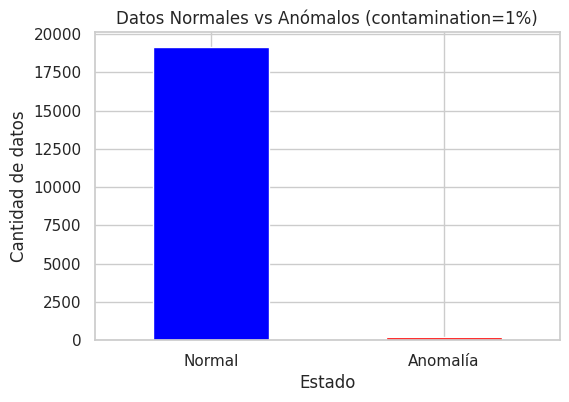

In [ ]:
# Gráfico de barras para datos normales vs anómalos (contamination=1%)
counts_1 = df_scaled['is_anomaly_2'].value_counts()
plt.figure(figsize=(6, 4))
counts_1.plot(kind='bar', color=['blue', 'red'])
plt.title("Datos Normales vs Anómalos (contamination=1%)")
plt.ylabel("Cantidad de datos")
plt.xlabel("Estado")
plt.xticks(rotation=0)
plt.show()

- Con contamination=0.05, se detectaron 964 anomalías; con contamination=0.01, solo 194.
- Las anomalías están bien distribuidas en INUT.


- Este método es robusto y efectivo para datos con distribución irregular.

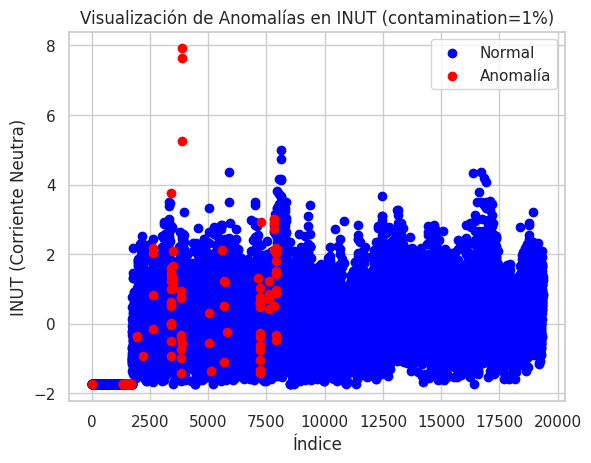

In [ ]:
# Visualización de datos anómalos sobre INUT (contamination=1%)
# Crear un scatter plot diferenciando anomalías y normales
plt.scatter(
    df_scaled[df_scaled['is_anomaly_2'] == 'Normal'].index,
    df_scaled[df_scaled['is_anomaly_2'] == 'Normal']['INUT'],
    color='blue',
    label='Normal'
)
plt.scatter(
    df_scaled[df_scaled['is_anomaly_2'] == 'Anomalía'].index,
    df_scaled[df_scaled['is_anomaly_2'] == 'Anomalía']['INUT'],
    color='red',
    label='Anomalía'
)

# Configurar título, etiquetas y leyenda
plt.title("Visualización de Anomalías en INUT (contamination=1%)")
plt.xlabel("Índice")
plt.ylabel("INUT (Corriente Neutra)")
plt.legend(loc='upper right')  # Leyenda configurada correctamente
plt.show()

1. Anomalías identificadas (rojas):

* Se observa una menor cantidad de puntos clasificados como anómalos debido a la baja configuración de contaminación (1%), como consecuencia se muestra menor numero de anomalias que con una contaminacion de 5%.
* Las anomalías se encuentran distribuidas principalmente en valores extremos de la variable INUT, tanto en el rango más bajo (alrededor de -2) como en los valores más altos (mayores a 6). Esto indica que el modelo está identificando puntos que se desvían significativamente de los valores esperados.
* Los valores atípicos que no se encuentran en los extremos podrían deberse a varios factores (sin ser experto en el area eléctrica):
  * Fluctuaciones intermitentes en la carga eléctrica.
  * Errores en la calibración de sensores.
  * Desbalanceo de cargas.
  * Condiciones ambientales inusuales
  
2. Datos normales (azules):

* Los puntos normales siguen una tendencia más estable en comparación con las anomalías, cubriendo el rango central de valores de INUT.

3. Densidad de las anomalías:
* Las anomalías parecen concentrarse en ciertas regiones, como alrededor del índice 0 a 7500 y entre valores extremos de INUT, indicando patrones anormales intermitentes en estas zonas o perido de tiempo. Algunas hipostesis de los valores anomalos entre 5.000 y 7.500.
  * Cambios operativos iniciales.
  * Problemas específicos en ese periodo de tiempo.

Experimento, analisis de correlaciones

# Fase 6: Detección con Local Outlier Factor (LOF)

In [ ]:
# Vamos a aplicar la técnica de detección de anomalías de Local Outlier Factor
# Pon aquí tu código
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df_LOF = pd.read_csv('/content/drive/MyDrive/UNIR/ML_US/muinar07_act3_CurrentVoltage.csv', sep=',')

df_LOF['DeviceTimeStamp'] = pd.to_datetime(df_LOF['DeviceTimeStamp'])

# Seleccionar las columnas relevantes para el análisis (excluyendo la marca de tiempo)
data = df_LOF[['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']]

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

# Aplicar Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')  # Ajustar "contamination" según la proporción de anomalías esperadas
labels = lof.fit_predict(df_scaled)

# Agregar etiquetas de anomalías al DataFrame
df_LOF['Anomaly_LOF'] = labels

# Reemplazar etiquetas: -1 (anomalías), 1 (normales)
df_LOF['Anomaly_LOF'] = df_LOF['Anomaly_LOF'].map({-1: 'Anomaly', 1: 'Normal'})
#df_LOF
# Contar datos normales y anómalos
counts = df_LOF['Anomaly_LOF'].value_counts()
print(counts)
df_LOF

Anomaly_LOF
Normal     19204
Anomaly      148
Name: count, dtype: int64


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,Anomaly_LOF
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
19347,2020-04-13 23:30:00,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0,Normal
19348,2020-04-13 23:45:00,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1,Normal
19349,2020-04-14 00:00:00,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8,Normal
19350,2020-04-14 00:15:00,247.7,245.9,245.5,70.1,36.7,88.1,428.2,424.3,428.4,45.2,Normal


A partir de la versión 0.22 de scikit-learn, el valor 'auto' establece la proporción de puntos que serán considerados como anomalías de forma automática basándose en la asimetría de la distribución de los datos. Esto evita que el usuario especifique manualmente un porcentaje de contaminación

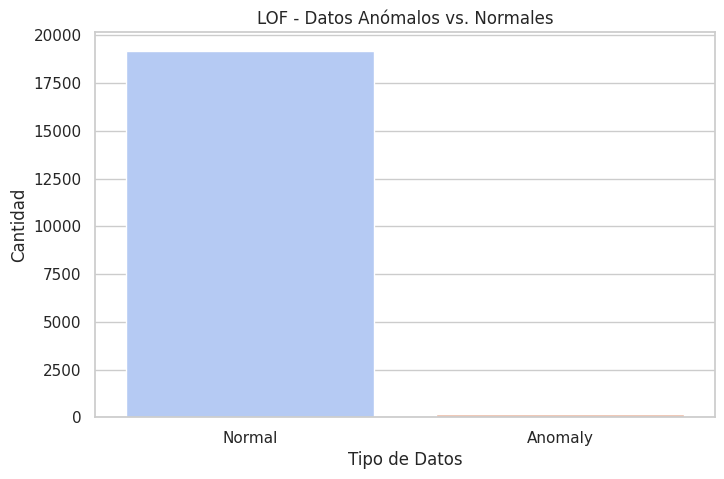

In [ ]:
# Crea un gráfico de barras para mostrar los datos anómalos vs los datos normales
plt.figure(figsize=(8, 5))
# sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, dodge=False, palette='coolwarm', legend=False)
plt.title('LOF - Datos Anómalos vs. Normales')
plt.xlabel('Tipo de Datos')
plt.ylabel('Cantidad')
plt.show()

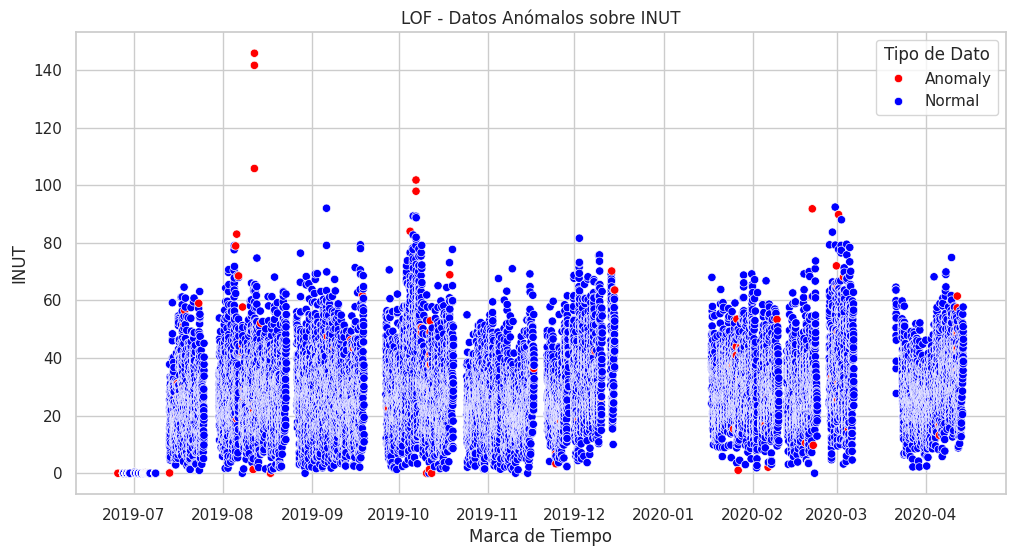

In [ ]:
# Crea un gráfico donde se puedan ver los datos anómalos sobre la variable INUT.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_LOF, x='DeviceTimeStamp', y='INUT', hue='Anomaly_LOF', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('LOF - Datos Anómalos sobre INUT')
plt.xlabel('Marca de Tiempo')
plt.ylabel('INUT')
plt.legend(title='Tipo de Dato')
plt.show()

# Anomalías en INUT con Local Outlier Factor (LOF)


- Este gráfico utiliza el método LOF para identificar anomalías en la variable INUT.
- Los puntos azules representan datos normales, mientras que los puntos rojos indican anomalías.
- Las anomalías están distribuidas en varios momentos del tiempo.


El método LOF identifica eficientemente valores atípicos locales, destacando regiones donde los datos se desvían significativamente de su vecindario local.
La mayoría de los datos son normales, pero las anomalías detectadas están bien definidas.


## Análisis

In [ ]:
# Realiza un análisis detallado de los resultados obtenidos en cada una de las técnicas aplicadas. Utiliza gráficos o trablas para apoyar tu conclusiones

Isolation Forest

### **Conclusiones Principales sobre las Anomalías Detectadas**

**Concentración de anomalías en índices 0 a 7500**:
  - Las anomalías son más frecuentes en este intervalo, lo que podría estar relacionado con cambios operativos iniciales, calibraciones, o eventos específicos en ese periodo.

**Concentración en valores extremos de INUT**
  - Muchas de las anomalías ocurren cuando la corriente neutra (INUT) está en valores máximos o mínimos, indicando desbalances severos o condiciones críticas del sistema.

**Distribución no uniforme de anomalías**
  - Las anomalías no están distribuidas aleatoriamente, sino que se agrupan en zonas específicas, indicando posibles patrones anormales intermitentes.

**Extremos como indicadores de problemas**
  - Los valores extremos de INUT (altos o cercanos a cero) suelen ser catalogados como anómalos, lo que podría reflejar problemas operativos, como cortocircuitos o desbalances.

**Limitación del modelo**
  - El modelo Isolation Forest tiende a detectar valores extremos como anómalos, lo cual es esperado, pero podría no considerar ciertas dinámicas internas del sistema.


## Conclusiones respecto de LOF

Los resultados muestra que las anomalías representan solo el 0.77% de los datos (148/19352), lo cual es típico en problemas de detección de outliers. El valor de 0.77% LOF lo ha generado de manera automatica basandose en la asimetria de los datos, este valor suele ser diferente si los datos se escalan o no.

Las anomalias con valores mas altos para la columna INUT se encuentran en el mes de agosto del 2019, siendo los valores mas alto de 145.8, 141.6 y 105.8; y los valores mas bajos se ubican en los mes de julio del 2019 con valoers de 0.1, 0.2 y 0.4; habria que resaltar que valores normales de INUT varian en el intervalo de [0.2 - 97.9]


# **Análisis y conclusiones tras usar la técnica de media móvil**


---

El gráfico muestra la detección de anomalías en la serie temporal de la variable INUT utilizando la técnica de media móvil con umbrales superior e inferior. La línea azul representa los valores originales de la variable, mientras que la línea naranja corresponde a la media móvil que suaviza las fluctuaciones.  Las anomalías, marcadas en rojo, se identifican como puntos fuera de los umbrales definidos, indicando posibles comportamientos atípicos en la serie. Este enfoque permite visualizar claramente las desviaciones significativas del comportamiento esperado. En conclusión el análisis hecho sobre la variable INUT haciendo uso de la técnica de detección de anomalías con media móvil permitió identificar comportamientos atípicos de manera visual y cuantitativa. El uso y ajuste de los umbrales para evitar valores negativos asegura que las anomalías detectadas sean relevantes y consistentes con el contexto de los datos, dicho método es efectivo para dar énfasis a puntos que se desvían significativamente del comportamiento esperado.

# Cuadro comparativo entre los modelos utilizados (Media Móvil, Z-Score, Isolation Forest y LOF).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos (ajusta el path al archivo CSV en tu Google Drive si lo necesitas)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/UNIR/ML_US/muinar07_act3_CurrentVoltage.csv', sep=',')

df['DeviceTimeStamp'] = pd.to_datetime(df['DeviceTimeStamp'])
data = df[['VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 1. Media Móvil
window_size = 50
media_movil = data['INUT'].rolling(window=window_size).mean()
desv_movil = data['INUT'].rolling(window=window_size).std()
thresh = 3
upper_bound = media_movil + thresh * desv_movil
lower_bound = media_movil - thresh * desv_movil

anomalies_moving_avg = ((data['INUT'] > upper_bound) | (data['INUT'] < lower_bound)).sum()

# 2. Z-Score
def calculate_z_score(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

z_scores = calculate_z_score(data['INUT'])
thresh_z = 3
anomalies_z_score = (np.abs(z_scores) > thresh_z).sum()

# 3. Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies_iso_forest = iso_forest.fit_predict(data_scaled)
anomalies_iso_forest_count = (anomalies_iso_forest == -1).sum()

# 4. Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels_lof = lof.fit_predict(data_scaled)
anomalies_lof_count = (labels_lof == -1).sum()

# Crear el cuadro comparativo
comparison = pd.DataFrame({
    'Método': ['Media Móvil', 'Z-Score', 'Isolation Forest', 'Local Outlier Factor'],
    'Anomalías Detectadas': [anomalies_moving_avg, anomalies_z_score, anomalies_iso_forest_count, anomalies_lof_count],
    'Comentarios': [
        'Sensible a la configuración del tamaño de ventana',
        'Asume una distribución normal en los datos',
        'Modelo robusto, funciona bien con grandes datasets',
        'Detecta anomalías locales basadas en la densidad de los datos'
    ]
})

# Mostrar el cuadro comparativo
print(comparison)


Mounted at /content/drive
                 Método  Anomalías Detectadas  \
0           Media Móvil                   175   
1               Z-Score                    72   
2      Isolation Forest                   964   
3  Local Outlier Factor                   968   

                                         Comentarios  
0  Sensible a la configuración del tamaño de ventana  
1         Asume una distribución normal en los datos  
2  Modelo robusto, funciona bien con grandes data...  
3  Detecta anomalías locales basadas en la densid...  


- Los métodos Isolation Forest y LOF detectaron un mayor número de anomalías debido a su capacidad de manejar datos multidimensionales y distribuciones complejas.
- Media Móvil y Z-Score detectaron menos anomalías, lo que podría deberse a la naturaleza de los datos (no normales y con sesgos) y a las limitaciones de sus supuestos.
- Recomendación: Para una detección robusta, se sugiere combinar los resultados de Isolation Forest y LOF, ajustando sus parámetros para reducir falsos positivos. Media Móvil y Z-Score pueden complementar estos análisis en contextos específicos.

# Conclusión

Esta actividad permitió explorar y aplicar cuatro métodos diferentes para la detección de anomalías en datos multivariados, proporcionando una comprensión práctica de sus capacidades y limitaciones:

1. Media Móvil: Este método es sencillo de implementar, pero puede ser sensible al tamaño de la ventana elegida y menos efectivo para detectar anomalías en datos con patrones complejos.

2. Z-Score: Es adecuado para distribuciones normales, pero pierde efectividad cuando los datos no cumplen este supuesto.

3. Isolation Forest: Se destacó por su capacidad para manejar datos grandes y multidimensionales, aunque su interpretación puede ser menos intuitiva.

4. Local Outlier Factor: Es útil para detectar anomalías locales en datos densos, pero puede verse afectado por la elección del número de vecinos.

# Reflexiones y Mejoras Propuestas

1. Combinación de Métodos: Utilizar un enfoque combinado que integre los resultados de varias técnicas para mejorar la precisión en la detección.

2. Optimización de Hiperparámetros: Investigar configuraciones óptimas para cada método en función de las características específicas del conjunto de datos.

3. Validación Cruzada: Implementar estrategias de validación cruzada para evaluar de manera más robusta el desempeño de los modelos.

4. Ampliación del Conjunto de Datos: Incorporar más datos relevantes y balanceados para mejorar la capacidad de generalización de los métodos.

## Artículos de investigación


#### Artículo 1

In [ ]:
# Coloca en este espacio el análisis del artículo 1


# Artículo 1 "Transferring Self-Supervised Pre-Trained Models for SHM Data Anomaly Detection with Scarce Labeled Data"
###Introducción
El artículo aborda el problema de la detección de anomalías en datos de monitoreo estructural (SHM, por sus siglas en inglés), un campo crítico para garantizar la seguridad e integridad de estructuras civiles. Con el aumento de sensores y datos generados, detectar anomalías resulta desafiante debido a la escasez de datos etiquetados. Las técnicas supervisadas tradicionales requieren grandes volúmenes de etiquetas, lo que resulta impráctico en la mayoría de aplicaciones SHM. Este trabajo explora el uso de aprendizaje auto-supervisado (SSL) como alternativa para preentrenar modelos con datos no etiquetados y luego ajustarlos con una cantidad mínima de datos etiquetados.

### Metodología
El enfoque propuesto incluye:

1. Reducción de datos: Conversión de datos de series temporales en características de bajo nivel utilizando un histograma de frecuencia relativo invertido (IERFH).
2. Preentrenamiento auto-supervisado: Empleo de tareas pretexto generativas y contrastivas para aprender representaciones significativas sin etiquetas.
3. Ajuste fino supervisado: Uso de datos etiquetados limitados para ajustar el modelo y mejorar la detección de anomalías.

### Objetivo

Desarrollar un enfoque eficaz para detectar anomalías en SHM utilizando una combinación de aprendizaje auto-supervisado y ajustado con datos etiquetados escasos. Este enfoque aborda problemas como distribución desconocida de datos y escasez de etiquetas, comunes en aplicaciones SHM.

### Dataset Utilizado
- Caso 1: Datos de un puente atirantado de gran alcance en China, recolectados durante un mes, con 38 acelerómetros que miden datos de vibración (IPC-SHM-2020).
- Caso 2: Datos de un puente de arco de gran alcance en China, recolectados durante tres meses, con 15 acelerómetros de un solo eje.
Ambos conjuntos de datos contienen patrones de datos etiquetados como normales, con anomalías menores, sesgadas, ruido, entre otros.

### Técnicas de Detección de Anomalías
Se evaluaron las siguientes técnicas:

1. Autoencoders (AE): Modelo generativo basado en codificación y decodificación de datos.
2. SimCLR: Aprendizaje contrastivo simple con aumentación de datos y proyección de características.
3. Mixup: Generación de muestras sintéticas mediante combinación convexa de datos.
4. GAN: Modelos generativo-contrastivos con redes generativas adversariales.
5. Entrenamiento supervisado (SUP): Base para comparar el rendimiento del enfoque auto-supervisado.

### Resultados Principales
1. El modelo basado en autoencoders (AE) mostró el mejor rendimiento general, superando métodos contrastivos y supervisados, con una puntuación F1 de hasta el 89.62% en el Caso 2.
2. Los métodos contrastivos (SimCLR y Mixup) mostraron menor consistencia, con resultados negativos en algunos escenarios.
3. La metodología propuesta demostró ser particularmente eficaz para detectar datos normales y anomalías frecuentes, aunque los patrones anómalos minoritarios (como sesgos y ruido) siguen siendo un desafío.
4. La integración de aprendizaje auto-supervisado reduce significativamente la necesidad de etiquetas y mejora la eficiencia computacional.

### Referencia Bibliográfica

Zhou, M., Jian, X., Xia, Y., & Lai, Z. (2024). Transferring self-supervised pre-trained models for SHM data anomaly detection with scarce labeled data. arXiv preprint arXiv:2412.03880. https://arxiv.org/abs/2412.03880

#### Artículo 2

In [ ]:
# Coloca en este espacio el análisis del artículo 2

# Artículo 2: "A Machine Learning-based Anomaly Detection Framework in Life Insurance Contracts"
### Introducción
El artículo aborda el desafío de identificar anomalías en contratos de seguros de vida mediante técnicas de aprendizaje automático no supervisado. En la industria de seguros, los datos son cruciales para garantizar la integridad de las operaciones, pero identificar patrones inusuales es complicado debido a la falta de datos etiquetados. Las anomalías pueden ser indicativas de fraudes, errores en los datos o patrones emergentes que requieren atención inmediata. Este estudio propone y evalúa métodos clásicos y modernos para detectar estas irregularidades en datos abiertos relacionados con seguros de salud, debido a la falta de acceso a datos reales de seguros de vida.

### Metodología
El estudio aplica y compara varias técnicas:

1. Métodos clásicos basados en proximidad: k-Nearest Neighbors (kNN), k-means, DBSCAN, y HDBSCAN.
2. Métodos basados en árboles: Isolation Forest.
3. Métodos modernos: Autoencoders (AE) y Variational Autoencoders (VAE), que utilizan redes neuronales para identificar patrones no lineales.

Los modelos se entrenaron con datos preprocesados, transformando variables categóricas mediante codificación one-hot y normalizando los datos para mejorar el rendimiento de los modelos. Para validar los métodos, se introdujeron manualmente anomalías en los conjuntos de datos.

### Objetivo
El principal objetivo es desarrollar un marco de detección de anomalías que pueda:

- Identificar irregularidades en los contratos de seguros.
- Operar de manera no supervisada, eliminando la necesidad de etiquetas.
- Ser accesible para empresas de seguros sin experiencia avanzada en ciencia de datos.
### Dataset Utilizado
Se usaron dos datasets abiertos:

1. Dataset 1: Contiene 986 observaciones y 12 variables continuas relacionadas con seguros médicos básicos.
2. Dataset 2: Contiene 25,000 observaciones y 24 variables, incluyendo información detallada sobre condiciones médicas, estilos de vida y costos de seguros. Ambos conjuntos fueron aumentados con anomalías artificiales para evaluar el rendimiento de los métodos.
### Técnicas de Detección de Anomalías
- kNN y k-means: Identifican anomalías basándose en distancias entre puntos y centroides de clústeres.
- DBSCAN y HDBSCAN: Detectan densidades inusuales para identificar outliers.
- Isolation Forest: Aisla puntos anómalos mediante particiones aleatorias en los datos.
- Autoencoders y VAEs: Reconstruyen datos a partir de representaciones comprimidas; un error de reconstrucción alto indica anomalías.
### Principales Resultados
1. Dataset 1 (pequeño y menos complejo):
- Isolation Forest, DBSCAN, y HDBSCAN detectaron todas las anomalías.
- Autoencoders y VAEs también identificaron todas las anomalías con un tiempo de ejecución aceptable.
2. Dataset 2 (grande y complejo):
- Métodos como DBSCAN y HDBSCAN fallaron debido al tamaño del dataset.
- Autoencoders y VAEs superaron a los métodos clásicos en precisión y consistencia, detectando todas las anomalías con tiempos de ejecución razonables.
- Isolation Forest mostró buen rendimiento, pero con una alta tasa de falsos positivos.

### Conclusión
Los autoencoders y VAEs demostraron ser herramientas robustas para la detección de anomalías en datos de seguros, especialmente en entornos no supervisados. Sin embargo, requieren más recursos computacionales en comparación con métodos clásicos como Isolation Forest, que sigue siendo una opción viable para aplicaciones más simples. El estudio destaca la necesidad de integrar métodos híbridos y explorar configuraciones avanzadas de modelos para mejorar la detección en datos complejos.

### Referencia en APA 7
Groll, A., Khanna, A., & Zeldin, L. (2024). A Machine Learning-based Anomaly Detection Framework in Life Insurance Contracts. arXiv preprint arXiv:2411.17495. Disponible en https://arxiv.org/abs/2411.17495.